In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [ ]:
# Upload the file
uploaded = files.upload()

Saving feeds.csv to feeds (2).csv


In [ ]:
# Install required libraries
!pip install pandas numpy matplotlib scikit-learn

In [ ]:
# Load the data
data = pd.read_csv("feeds.csv")

In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['latitude', 'longitude', 'elevation', 'status', 'entry_id'])

In [ ]:
# Preview the data to check the first few rows
print(data.head())

                  created_at  field1
0  2024-11-16T10:13:24+00:00     806
1  2024-11-16T10:13:40+00:00     805
2  2024-11-16T10:13:55+00:00     784
3  2024-11-16T10:14:12+00:00    1024
4  2024-11-16T10:14:29+00:00     788


In [ ]:
# Check for missing values and handle them
if data.isnull().sum().any():
    print("Missing values detected. Handling missing values...")
    data = data.dropna()

In [ ]:
# Convert 'created_at' to datetime and set it as index
data['created_at'] = pd.to_datetime(data['created_at'])
data.set_index('created_at', inplace=True)

In [ ]:
# Extract the relevant field (field1 represents soil dryness level)
soil_moisture = data['field1']

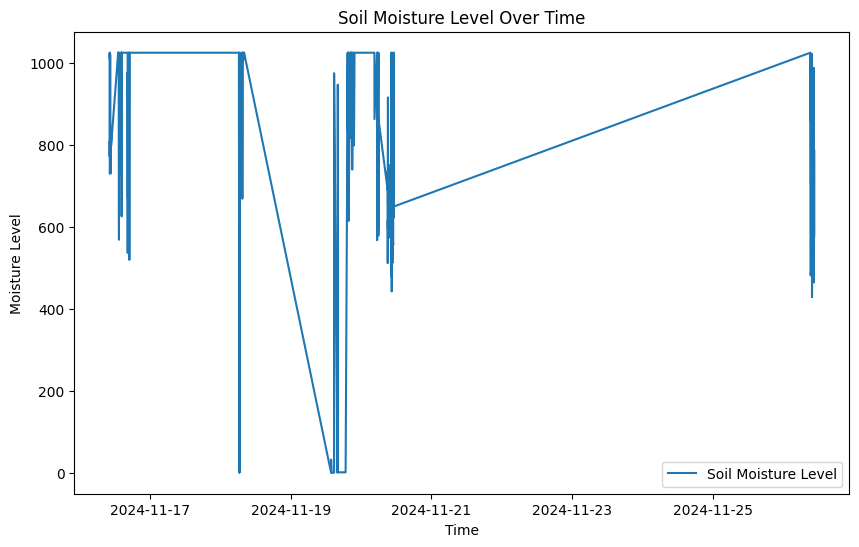

In [ ]:
# Plot the data for visualization
plt.figure(figsize=(10, 6))
plt.plot(soil_moisture, label='Soil Moisture Level')
plt.title('Soil Moisture Level Over Time')
plt.xlabel('Time')
plt.ylabel('Moisture Level')
plt.legend()
plt.show()

In [ ]:
# Create lag features
data['lag_1'] = data['field1'].shift(1)
data['lag_2'] = data['field1'].shift(2)
data.dropna(inplace=True)  # Remove rows with missing values after creating lag features

In [ ]:
# Split the data into training and testing sets
X = data[['lag_1', 'lag_2']]
y = data['field1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predict
y_pred = model.predict(X_test)

In [ ]:
# Number of future predictions
n_future = 10

In [ ]:
# Initialize the predictions with the last known data
future_predictions = []

In [ ]:
# Get the last two lagged values from the data
latest_lag_1 = data['field1'].iloc[-1]
latest_lag_2 = data['field1'].iloc[-2]

In [ ]:
# Iteratively predict the next values
for _ in range(n_future):
    input_features = np.array([[latest_lag_1, latest_lag_2]])  # Prepare input for the model
    next_prediction = model.predict(input_features)[0]
    future_predictions.append(next_prediction)

    # Update the lagged values for the next iteration
    latest_lag_2, latest_lag_1 = latest_lag_1, next_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does

In [ ]:
# Print the predicted future values
print("Predicted Future Soil Moisture Levels:", future_predictions)

Predicted Future Soil Moisture Levels: [613.46, 688.64, 718.78, 804.48, 734.31, 756.8, 704.9076666666666, 729.7710000000001, 768.8990000000001, 857.59]


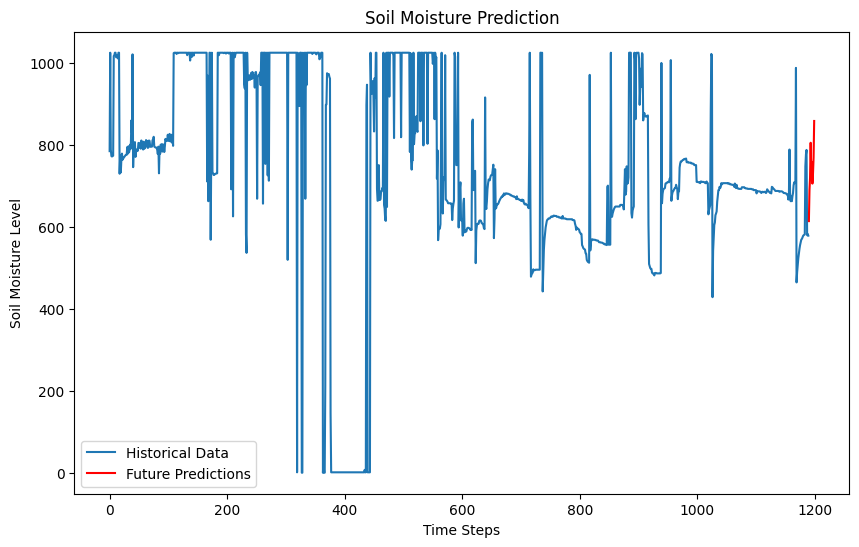

In [ ]:
# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(range(len(data)), data['field1'], label='Historical Data')
plt.plot(range(len(data), len(data) + n_future), future_predictions, label='Future Predictions', color='red')
plt.xlabel('Time Steps')
plt.ylabel('Soil Moisture Level')
plt.title('Soil Moisture Prediction')
plt.legend()
plt.show()

In [ ]:
# Define soil condition classifier
def classify_soil_condition(moisture):
    if moisture > 950:
        return "Dry"
    elif 800 <= moisture <= 950:
        return "Moderate"
    else:
        return "Wet"

In [ ]:
# Apply soil condition classification
data['condition'] = data['field1'].apply(classify_soil_condition)
print(data[['field1', 'condition']].head())

                           field1 condition
created_at                                 
2024-11-16 10:13:55+00:00     784       Wet
2024-11-16 10:14:12+00:00    1024       Dry
2024-11-16 10:14:29+00:00     788       Wet
2024-11-16 10:14:45+00:00     772       Wet
2024-11-16 10:15:00+00:00     771       Wet


In [ ]:
# Encode labels
le = LabelEncoder()
data['condition_encoded'] = le.fit_transform(data['condition'])

In [ ]:
# Train a Decision Tree Classifier
X = data[['field1']]
y = data['condition_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict and evaluate
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
print("Classification Accuracy:", accuracy_score(y_test, y_pred))

Classification Accuracy: 1.0


In [ ]:
# Example moisture level prediction
input_value = 1000  # Example moisture level
predicted_condition = le.inverse_transform(classifier.predict([[input_value]]))
print("Predicted Soil Condition:", predicted_condition)

Predicted Soil Condition: ['Dry']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Example moisture level prediction
input_value = 800  # Example moisture level
predicted_condition = le.inverse_transform(classifier.predict([[input_value]]))
print("Predicted Soil Condition:", predicted_condition)

Predicted Soil Condition: ['Moderate']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Example moisture level prediction
input_value = 500  # Example moisture level
predicted_condition = le.inverse_transform(classifier.predict([[input_value]]))
print("Predicted Soil Condition:", predicted_condition)

Predicted Soil Condition: ['Wet']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


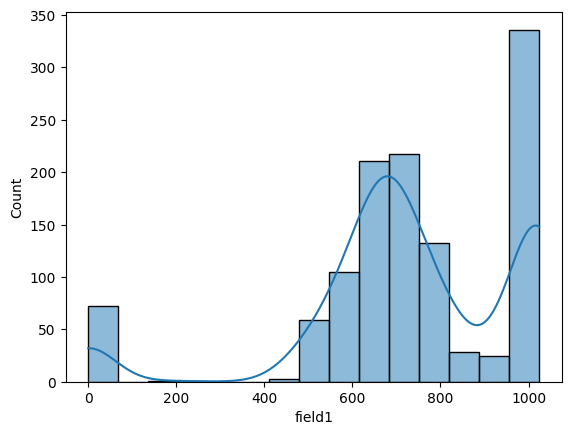

In [ ]:
# Visualize data distribution with histogram and KDE
sns.histplot(data['field1'], kde=True)
plt.show()

In [ ]:
# Train the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly'] = isolation_forest.fit_predict(data[['field1']])

In [ ]:
# Convert anomaly results to readable labels
data['anomaly'] = data['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

In [ ]:
# Filter anomalies
anomalies = data[data['anomaly'] == 'Anomaly']
print(anomalies)

                           field1   lag_1   lag_2 condition  \
created_at                                                    
2024-11-16 13:14:48+00:00    1005  1024.0  1024.0       Dry   
2024-11-16 16:22:28+00:00     948  1024.0  1024.0  Moderate   
2024-11-16 16:22:43+00:00     937   948.0  1024.0  Moderate   
2024-11-16 16:27:15+00:00     939   969.0   963.0  Moderate   
2024-11-16 16:29:56+00:00     945   976.0   970.0  Moderate   
2024-11-18 06:27:31+00:00     924   919.0  1024.0  Moderate   
2024-11-18 06:30:29+00:00       0  1024.0  1024.0       Wet   
2024-11-18 06:30:45+00:00       0     0.0  1024.0       Wet   
2024-11-18 06:37:23+00:00     924  1024.0     0.0  Moderate   
2024-11-18 07:33:10+00:00     945  1024.0   668.0  Moderate   
2024-11-19 13:48:36+00:00       0  1024.0  1024.0       Wet   
2024-11-19 13:48:52+00:00      32     0.0  1024.0       Wet   
2024-11-19 13:57:02+00:00       0    32.0     0.0       Wet   
2024-11-19 14:48:50+00:00       0     0.0    32.0      

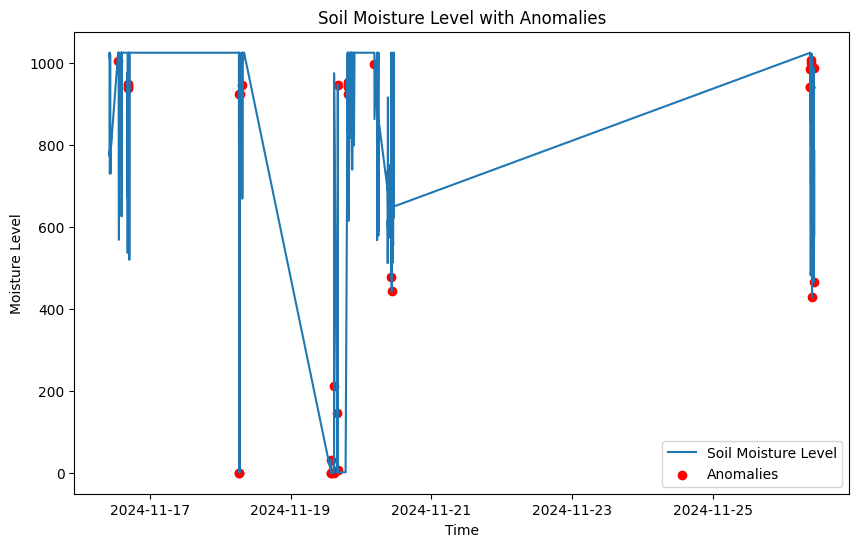

In [ ]:
# Visualize anomalies over time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['field1'], label='Soil Moisture Level')
plt.scatter(anomalies.index, anomalies['field1'], color='red', label='Anomalies')
plt.title('Soil Moisture Level with Anomalies')
plt.xlabel('Time')
plt.ylabel('Moisture Level')
plt.legend()
plt.show()

In [ ]:
data

,field1,lag_1,lag_2,condition,condition_encoded,anomaly
created_at,,,,,,
2024-11-16 10:13:55+00:00,784,805.0,806.0,Wet,2,Normal
2024-11-16 10:14:12+00:00,1024,784.0,805.0,Dry,0,Normal
2024-11-16 10:14:29+00:00,788,1024.0,784.0,Wet,2,Normal
2024-11-16 10:14:45+00:00,772,788.0,1024.0,Wet,2,Normal
2024-11-16 10:15:00+00:00,771,772.0,788.0,Wet,2,Normal
...,...,...,...,...,...,...
2024-11-26 10:39:56+00:00,776,747.0,581.0,Wet,2,Normal
2024-11-26 10:40:11+00:00,787,776.0,747.0,Wet,2,Normal
2024-11-26 10:40:28+00:00,579,787.0,776.0,Wet,2,Normal


In [ ]:
data.to_csv("processed_soil_data.csv")

In [ ]:
from google.colab import files
files.download('processed_soil_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>